# Linear Regression 

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/xiaochangmiao/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("Advertising.csv")
data.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


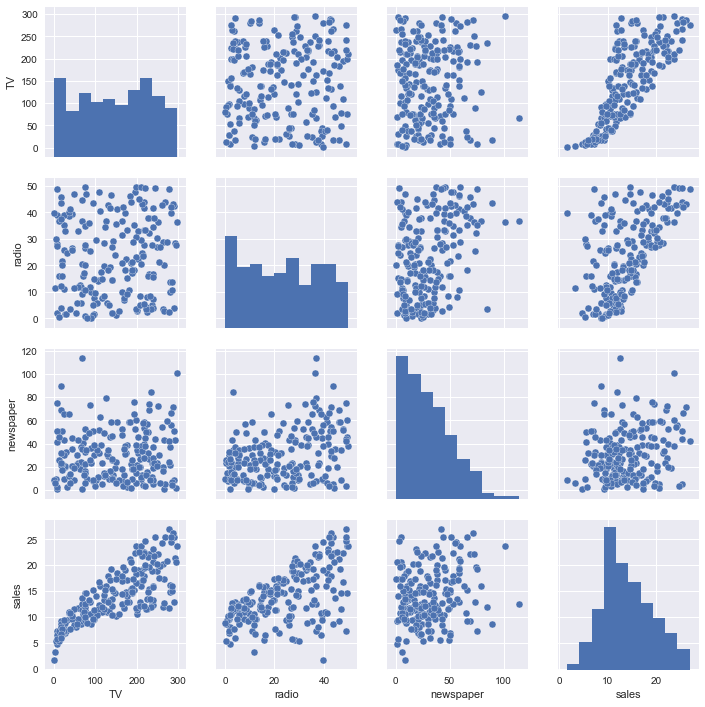

In [3]:
sns.pairplot(data)
plt.show()

# Modeling

## Model#1: include only main effects

In [4]:
model = smf.ols(formula = "sales ~ TV + radio + newspaper", data = data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Nov 2017   Prob (F-statistic):           1.58e-96
Time:                        13:05:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

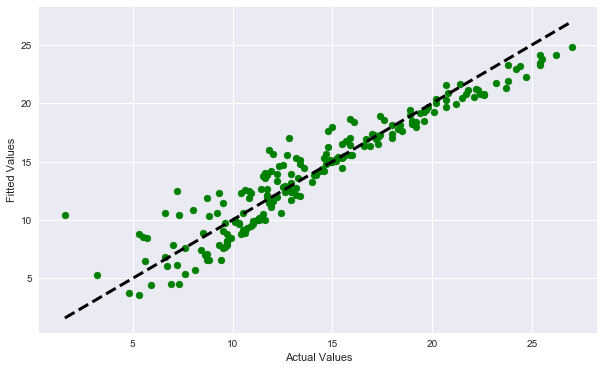

In [51]:
y = data.sales
X = data[["TV", "radio", "newspaper"]]
ypred = result.predict(X)
plt.figure(figsize = (10, 6))
plt.scatter(y, ypred, color = "green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 3)
plt.xlabel("Actual Values")
plt.ylabel("Fitted Values")

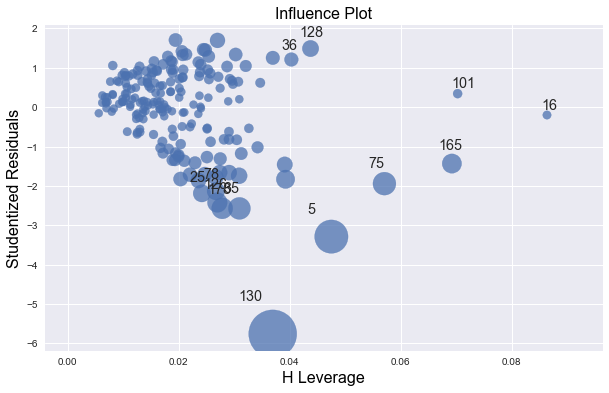

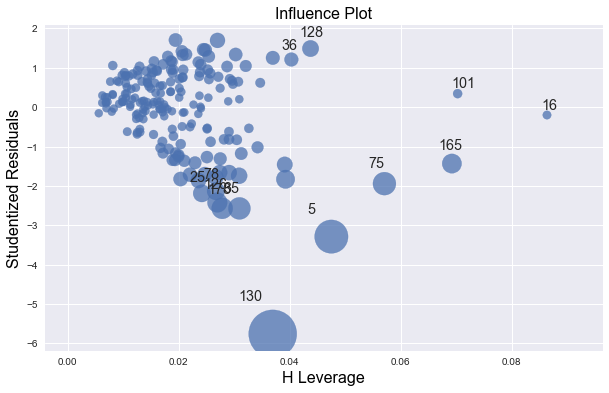

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sm.graphics.influence_plot(result, ax = ax, criterion="cooks")

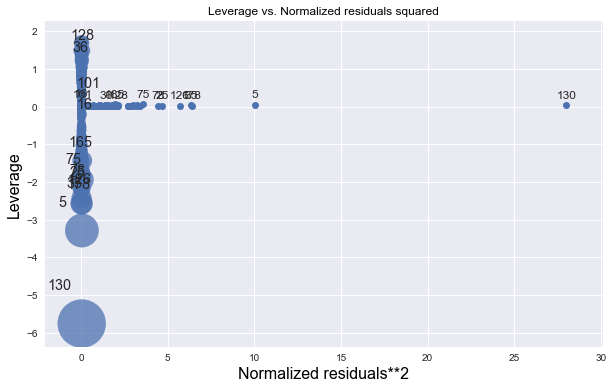

In [53]:
sm.graphics.plot_leverage_resid2(result, ax = ax)

### Model #2: Including the interactive terms

In [13]:
model2 = smf.ols(formula = 'sales ~ TV + radio + TV * radio', data = data)
res2 = model2.fit()
print res2.summary()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):          6.68e-146
Time:                        13:11:26   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

** Compare to model#1, adj. $R^2$ increases from 0.896 to 0.967, which suggests including the interaction term TV $\times$ radio definitely improves model accuracy.**

In [16]:
X = data[["TV", "radio"]]
ypred = res2.predict(X)
y = data.sales

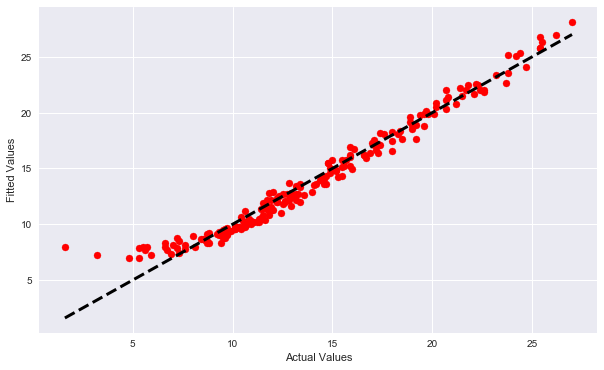

In [32]:
plt.figure(figsize = (10, 6))
plt.scatter(y, ypred, color = "red")
plt.xlabel("Actual Values")
plt.ylabel("Fitted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 3)

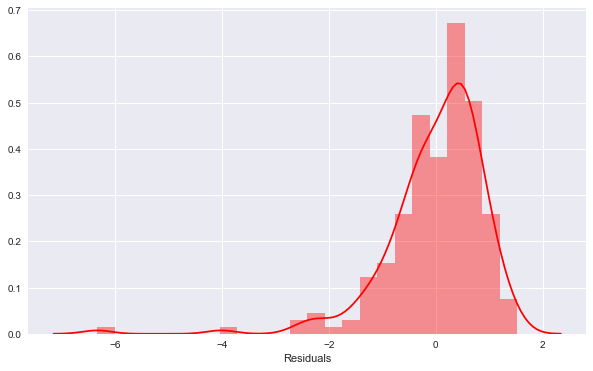

In [49]:
plt.figure(figsize = (10, 6))
sns.distplot(res2.resid, color = 'red')
plt.xlabel("Residuals")

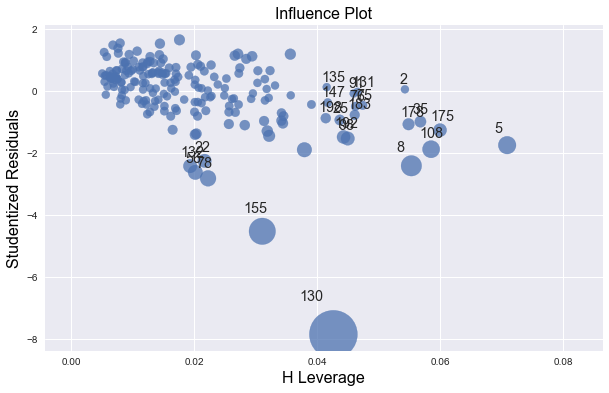

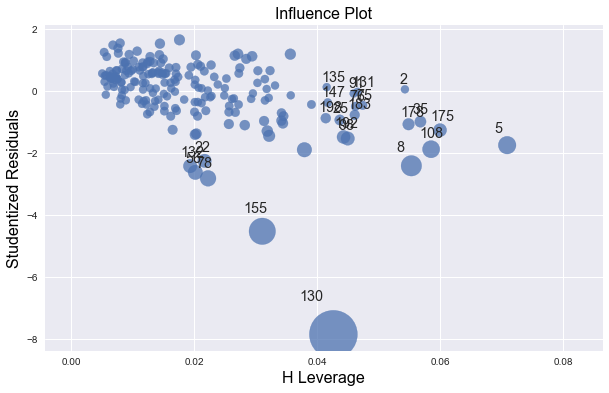

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sm.graphics.influence_plot(res2, ax = ax, criterion="cooks")

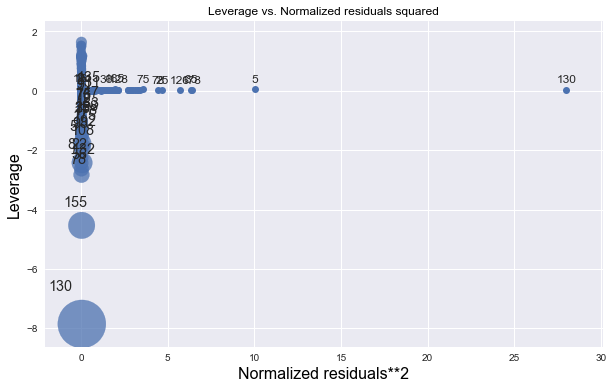

In [55]:
sm.graphics.plot_leverage_resid2(result, ax = ax)